In [1]:
from services.load_audio_data_service import LoadAudioDataService

In [2]:
path = 'data/PC1_20090513_050000_0020.wav'
audio = LoadAudioDataService()
audio.load(path).trim().play()

In [3]:
H, P = audio.hpss_filter()

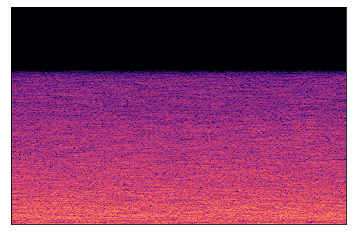

In [4]:
H.display('spec')

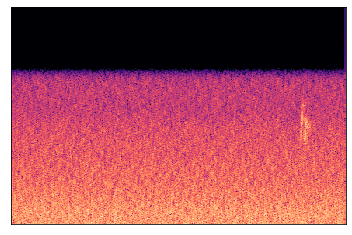

In [6]:
P.display('spec')

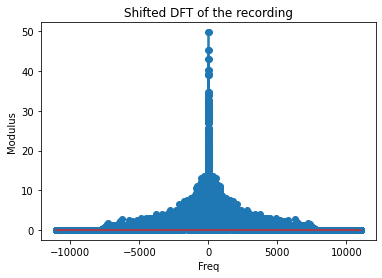

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile
from IPython.display import Audio

# Some useful values
N = len(audio.y)    # total number of samples
L = N / audio.sr # length of sound clip (in seconds)
t = np.arange(0,N-1) * L/N  # array of time stamps for samples

# Corresponding array of sampled frequencies
omega = np.fft.fftshift(np.arange(-N/2, N/2)) / L

F = np.fft.fft(audio.y)
plt.stem(omega,abs(F), use_line_collection=True)
plt.title("Shifted DFT of the recording")
plt.xlabel("Freq")
plt.ylabel("Modulus")
plt.show()

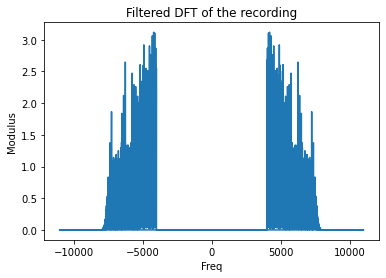

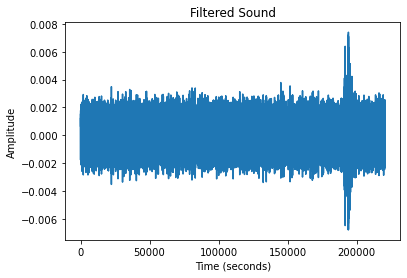

In [39]:
# T = 600000
# F_c = F.copy()
# F_c[abs(F_c)>T] = 0
tao = 4000 
F_c = F.copy()
F_c[abs(omega) < tao] = 0
plt.plot(omega,abs(F_c))
plt.title("Filtered DFT of the recording")
plt.xlabel("Freq")
plt.ylabel("Modulus")
plt.show()
f_new = np.real(np.fft.ifft(F_c))
plt.plot(f_new)
plt.title('Filtered Sound')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
Audio(f_new, rate=audio.sr)